# 图像特效-灰度浮雕

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [9]:
def gray_emboss(src,angle=30.,offset=127):
    srcf = src.astype(np.float32)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    radian = angle*np.pi/180.0
    kernel = np.array([
        [np.cos(radian + np.pi / 4.),np.cos(radian + np.pi / 2.),np.cos(radian + 3.0 * np.pi / 4.0)],
        [np.cos(radian),0,np.cos(np.pi)],
        [np.cos(radian - np.pi / 4),np.cos(radian - np.pi / 2),np.cos(radian - 3.0 * np.pi / 4.0)]
    ])
    dstr =  signal.convolve2d(srcf[:,:,0],kernel, boundary='symm', mode='same')
    dstg =  signal.convolve2d(srcf[:,:,1],kernel, boundary='symm', mode='same')
    dstb =  signal.convolve2d(srcf[:,:,2],kernel, boundary='symm', mode='same')
    dst = cv2.merge([dstr,dstg,dstb]) + offset
    dst[dst > 255] = 255
    dst[dst < 0] = 0
    return dst.astype(np.uint8)

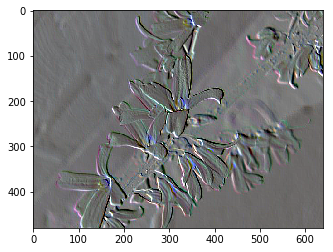

In [10]:
dst = gray_emboss(rgb)
plt.imshow(dst)